In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, r2_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

In [26]:
housing = pd.read_csv(r'..\Datasets\Housing.csv')
print(housing.info())
X = housing.drop('price', axis=1)
y = housing['price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB
None


In [27]:
# categorical_features = ['driveway',  'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
categorical_features = list(X.select_dtypes(include=object).columns)

In [28]:
cbr = CatBoostRegressor(random_state =24, cat_features = categorical_features)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [30]:
cbr.fit(X_train, y_train)

y_pred = cbr.predict(X_test)
y_pred

Learning rate set to 0.035168
0:	learn: 26401.5780724	total: 1.43ms	remaining: 1.43s
1:	learn: 25978.7424047	total: 2.68ms	remaining: 1.34s
2:	learn: 25562.4776567	total: 3.97ms	remaining: 1.32s
3:	learn: 25174.5545802	total: 5.1ms	remaining: 1.27s
4:	learn: 24813.2769041	total: 6.25ms	remaining: 1.24s
5:	learn: 24409.3346585	total: 7.37ms	remaining: 1.22s
6:	learn: 24090.4271427	total: 8.68ms	remaining: 1.23s
7:	learn: 23769.0521312	total: 9.86ms	remaining: 1.22s
8:	learn: 23464.5364251	total: 11.2ms	remaining: 1.23s
9:	learn: 23124.8319264	total: 12.5ms	remaining: 1.24s
10:	learn: 22818.0762020	total: 14ms	remaining: 1.26s
11:	learn: 22531.3535513	total: 15.4ms	remaining: 1.27s
12:	learn: 22215.1129317	total: 16.8ms	remaining: 1.27s
13:	learn: 21915.4604994	total: 18ms	remaining: 1.27s
14:	learn: 21628.2409282	total: 19.3ms	remaining: 1.27s
15:	learn: 21380.1514422	total: 20.5ms	remaining: 1.26s
16:	learn: 21114.2843282	total: 21.7ms	remaining: 1.25s
17:	learn: 20887.1565683	total: 2

array([ 47464.88349206,  65076.67827074,  75360.01963942,  89149.87459879,
        78190.07682581, 108366.00459541,  80450.86639654,  79173.31588553,
        59105.67042401,  67328.38242454,  45357.92870501,  64813.90139898,
        52497.02202473,  93831.55721972, 100817.09430477,  59427.37241841,
        58190.56116408,  61760.81273906,  66564.45589492,  81359.70116422,
        73947.61824778,  69997.64970971,  90143.89430524, 100378.22926529,
        36236.56391983,  58454.07197176,  57086.59148014,  62319.84242663,
       123777.50628105,  54038.38063832,  44724.73551372,  92805.70934973,
        88547.88715193,  37530.00879172,  61287.8556625 ,  67206.52863654,
        75699.64960505,  54500.23229349,  64115.23789487,  91570.62632299,
        42349.16473747, 124718.61946925,  68430.81212267,  66908.47704482,
        82572.3212305 ,  71749.54877794,  29930.23751722,  82637.84425706,
        72910.58996512,  66627.36917882,  58454.48982404,  76139.00872383,
        74351.0129531 ,  

In [34]:
r2_score(y_test, y_pred)

0.6146747368236991

In [36]:
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
print(cbr.get_params())

{'loss_function': 'RMSE', 'random_state': 24, 'cat_features': ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']}


In [37]:
params = {'learning_rate': np.linspace(0.001, 0.9,10), 
          'max_depth': [None,3,2,4], 
          'n_estimators':[25, 50 ,100],  
          }
gcv = GridSearchCV(cbr, param_grid=params, cv=kfold, 
                   scoring='r2', n_jobs=-1)
gcv.fit(X, y)

print(gcv.best_score_)
print(gcv.best_params_)

0:	learn: 22957.2788738	total: 848us	remaining: 20.4ms
1:	learn: 20571.7014201	total: 1.88ms	remaining: 21.6ms
2:	learn: 18991.0936338	total: 2.54ms	remaining: 18.6ms
3:	learn: 17935.5884377	total: 3.2ms	remaining: 16.8ms
4:	learn: 17223.2643907	total: 3.84ms	remaining: 15.4ms
5:	learn: 16706.5835631	total: 4.46ms	remaining: 14.1ms
6:	learn: 16250.3615955	total: 5.12ms	remaining: 13.2ms
7:	learn: 15879.4662517	total: 5.77ms	remaining: 12.3ms
8:	learn: 15430.5186150	total: 6.41ms	remaining: 11.4ms
9:	learn: 15207.4315182	total: 7.07ms	remaining: 10.6ms
10:	learn: 15062.4558875	total: 7.7ms	remaining: 9.8ms
11:	learn: 14839.3348923	total: 8.34ms	remaining: 9.03ms
12:	learn: 14821.2280668	total: 8.68ms	remaining: 8.01ms
13:	learn: 14653.6076359	total: 9.32ms	remaining: 7.32ms
14:	learn: 14512.0546123	total: 9.95ms	remaining: 6.63ms
15:	learn: 14413.2605760	total: 10.6ms	remaining: 5.94ms
16:	learn: 14352.8208852	total: 11.2ms	remaining: 5.26ms
17:	learn: 14259.5774198	total: 11.8ms	remain

In [40]:
best_model = gcv.best_estimator_

In [43]:
df_imp = pd.DataFrame({'Feature':list(X.columns),
                       'Importance':best_model.feature_importances_})

<Axes: xlabel='Importance', ylabel='Feature'>

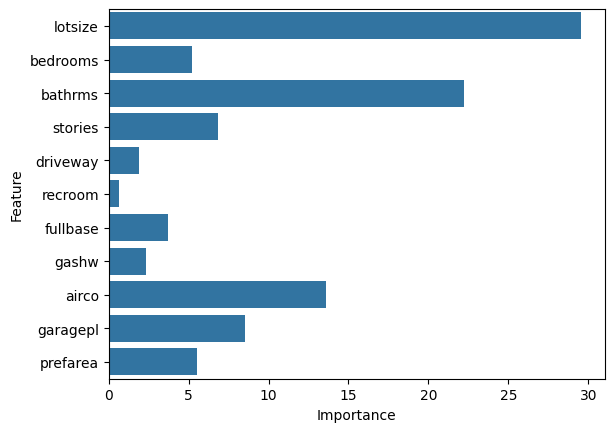

In [46]:
sns.barplot(data=df_imp, y="Feature", x="Importance",orient='h')


In [38]:
import catboost
catboost.__version__

'1.2.5'